###  Armandas Bruzas,  Machine learning exam project
##  CIFAR-10 - Image classification
Dataset description: http://www.cs.toronto.edu/~kriz/cifar.html

In [1]:
# Check python version, need 3.6 or 3.7 for tensorflow to work
from platform import python_version
print(python_version())

3.6.9


In [2]:
# Set up and import libraries
import numpy
import matplotlib
import pandas as pd
from matplotlib import pyplot

# Tensorflow and keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical

# To make output of the notebook more stable
numpy.random.seed(42)
tf.random.set_seed(42)


In [3]:
# Get data set and split it intto test and training data
dataset = keras.datasets.cifar10
(images_data_train, labels_data_train), (images_data_test, labels_data_test) = dataset.load_data()

# inspect data
print(images_data_train.shape)
# amount of data, data width, data height, dementions (3 = RGB) 

(50000, 32, 32, 3)


In [4]:
# Prepare images (normalize pixels), we want to work with values between 1 and 0
images_valid, images_train = images_data_train[:5000] / 255.0, images_data_train[5000:] / 255.0, 
labels_valid, labels_train = labels_data_train[:5000], labels_data_train[5000:], 
images_test = images_data_test / 255.0

# We also take some data form training data and use it as validation data during training
print('images to train on: ', images_train.shape)
print('images to validate on: ', images_valid.shape)
print('images to test on: ', images_test.shape)

images to train on:  (45000, 32, 32, 3)
images to validate on:  (5000, 32, 32, 3)
images to test on:  (10000, 32, 32, 3)


['Frog']


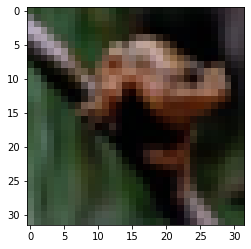

In [5]:
# Set up label values, we want labels to be categorical
imageClassificationNames = [ 'Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck'];
labels_valid_categorical = to_categorical(labels_valid);
labels_train_categorical = to_categorical(labels_train);

# Take a look at example of the image
print( numpy.array(imageClassificationNames)[labels_train[0].astype(int)] )
pyplot.imshow(images_train[0]) 
pyplot.show()

In [6]:
model = keras.Sequential()

# Add the first layer
model.add(Conv2D(32, (5,5), activation='relu', input_shape=(32, 32, 3)))

# Add a pooling layer
model.add(MaxPooling2D( pool_size=(2,2)))

# add convolution layer
model.add(Conv2D(32, (5,5), activation='relu'))

# Add a pooling layer
model.add(MaxPooling2D( pool_size=(2,2)))

# Add flattening layer
model.add(Flatten())

#Add a layer with 500 neurons
model.add(Dense(500, activation='relu'))

#Add drop out layer
model.add(Dropout(0.5))

#Add a layer with 250 neurons
model.add(Dense(250, activation='relu'))

#Add a layer with 250 neurons
model.add(Dense(250, activation='relu'))

#Add a layer with 10 neurons
model.add(Dense(10, activation='softmax'))

# Check model's summary
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 500)               400500    
_________________________________________________________________
dropout (Dropout)            (None, 500)               0

In [7]:
# Compile the model
model.compile( loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics= ['accuracy'] )

# Add early stop for the model
early_stop = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

# Add learning rate reducer for the model
learning_rate = keras.callbacks.ReduceLROnPlateau(factor=0.2, patience=4)

In [8]:
# Finally, start training
history = model.fit( images_train,
                    labels_train_categorical,
                    epochs=30,
                    batch_size=32,
                    validation_data=(images_valid, labels_valid_categorical),
                    callbacks=[early_stop, learning_rate]
                    )

Epoch 1/30
1407/1407 [==============================] - 71s 51ms/step - loss: 1.6215 - accuracy: 0.3979 - val_loss: 1.5161 - val_accuracy: 0.4834
Epoch 2/30
1407/1407 [==============================] - 71s 50ms/step - loss: 1.3133 - accuracy: 0.5295 - val_loss: 1.1540 - val_accuracy: 0.5962
Epoch 3/30
1407/1407 [==============================] - 71s 51ms/step - loss: 1.1686 - accuracy: 0.5844 - val_loss: 1.0651 - val_accuracy: 0.6230
Epoch 4/30
1407/1407 [==============================] - 72s 51ms/step - loss: 1.0724 - accuracy: 0.6180 - val_loss: 1.0590 - val_accuracy: 0.6348
Epoch 5/30
1407/1407 [==============================] - 72s 51ms/step - loss: 0.9958 - accuracy: 0.6472 - val_loss: 1.0460 - val_accuracy: 0.6410
Epoch 6/30
1407/1407 [==============================] - 72s 51ms/step - loss: 0.9385 - accuracy: 0.6673 - val_loss: 0.9506 - val_accuracy: 0.6696
Epoch 7/30
1407/1407 [==============================] - 72s 51ms/step - loss: 0.8900 - accuracy: 0.6857 - val_loss: 0.9548 -

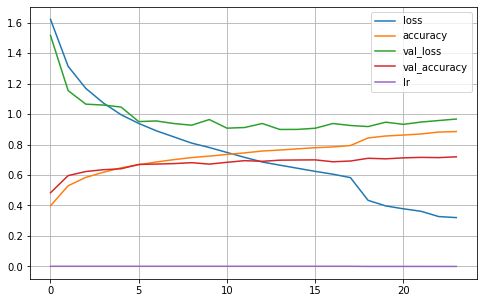

In [9]:
# Now we can see learning grapgh
pd.DataFrame(history.history).plot(figsize=(8,5))
pyplot.grid(True)
pyplot.show()

In [10]:
# Evaluate the results
model.evaluate(images_test, to_categorical(labels_data_test))

313/313 [==============================] - 4s 14ms/step - loss: 0.9151 - accuracy: 0.6892


[0.9150648713111877, 0.6891999840736389]

In [12]:
# Try to predict some images
images_new = images_test[:3]

# Here we can see the persentages of propability of classification
print(imageClassificationNames)
labels_prob = model.predict(images_new)
labels_prob.round(2)

['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']


array([[0.01, 0.07, 0.  , 0.59, 0.  , 0.07, 0.  , 0.  , 0.25, 0.  ],
       [0.  , 0.89, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.11, 0.  ],
       [0.05, 0.35, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.52, 0.07]],
      dtype=float32)